In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
cab = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer = pd.read_csv("Customer_ID.csv")
transaction = pd.read_csv("Transaction_ID.csv")

# Cab Data

In [3]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [7]:
cab.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [8]:
cab.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [22]:
cab["Date of Travel"].duplicated().sum()

358297

In [23]:
cab.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

In [24]:
type(cab["Date of Travel"])

pandas.core.series.Series

In [25]:
cab["Date of Travel"] = pd.to_datetime(cab["Date of Travel"])

In [31]:
cab["Date of Travel"].dt.year

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
359387    1970
359388    1970
359389    1970
359390    1970
359391    1970
Name: Date of Travel, Length: 359392, dtype: int64

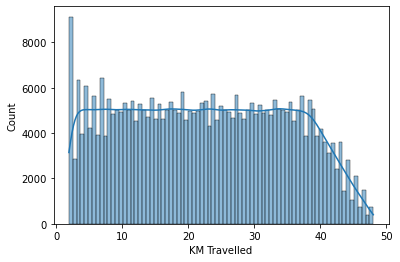

In [33]:
sns.histplot(cab['KM Travelled'], kde=True)

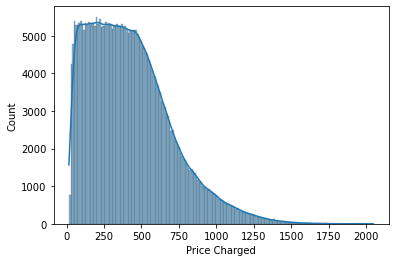

In [34]:
sns.histplot(cab['Price Charged'], kde=True)

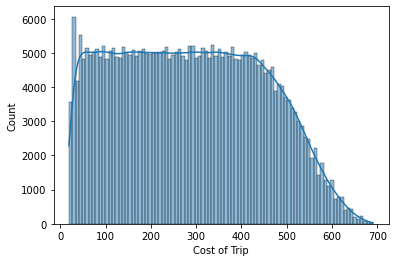

In [35]:
sns.histplot(cab['Cost of Trip'], kde=True)

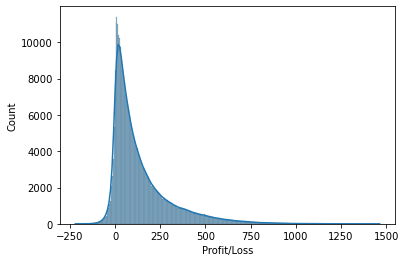

In [36]:
cab["Profit/Loss"] = cab["Price Charged"] - cab["Cost of Trip"]
sns.histplot(cab['Profit/Loss'], kde=True)

In [38]:
cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit/Loss
0,10000011,1970-01-01 00:00:00.000042377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10000012,1970-01-01 00:00:00.000042375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
2,10000013,1970-01-01 00:00:00.000042371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680
3,10000014,1970-01-01 00:00:00.000042376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980
4,10000015,1970-01-01 00:00:00.000042372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440
...,...,...,...,...,...,...,...,...
359387,10440101,1970-01-01 00:00:00.000043108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,1970-01-01 00:00:00.000043104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,1970-01-01 00:00:00.000043105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,1970-01-01 00:00:00.000043105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420


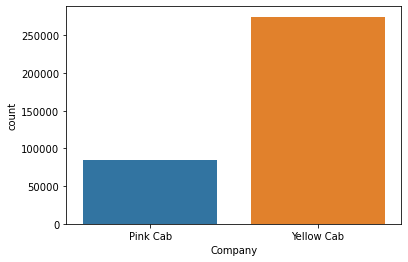

In [44]:
sns.countplot(cab["Company"])

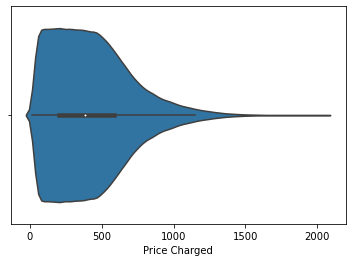

In [45]:
sns.violinplot(cab["Price Charged"])

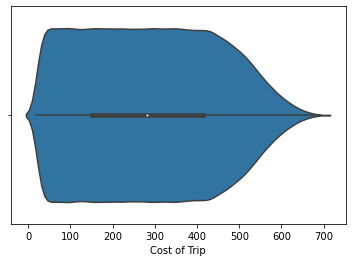

In [46]:
sns.violinplot(cab["Cost of Trip"])

In [47]:
cab["Price Charged"].sort_values(ascending=False)

138644    2048.03
138669    2016.70
138766    2013.95
247599    1993.83
138548    1981.05
           ...   
285213      16.76
132169      16.53
15884       16.38
246581      15.75
143508      15.60
Name: Price Charged, Length: 359392, dtype: float64

In [48]:
cab["Cost of Trip"].sort_values(ascending=False)

239548    691.20
198854    691.20
50001     691.20
119534    691.20
319327    691.20
           ...  
354348     19.19
85647      19.19
269738     19.19
101769     19.00
350858     19.00
Name: Cost of Trip, Length: 359392, dtype: float64

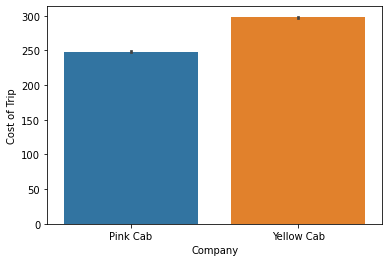

In [49]:
sns.barplot(y='Cost of Trip', x='Company', data=cab, estimator=np.mean)

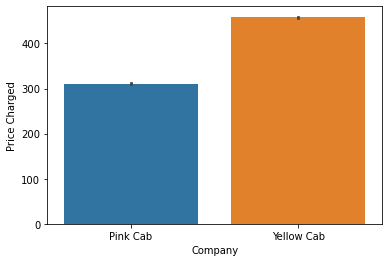

In [50]:
sns.barplot(y='Price Charged', x='Company', data=cab, estimator=np.mean)

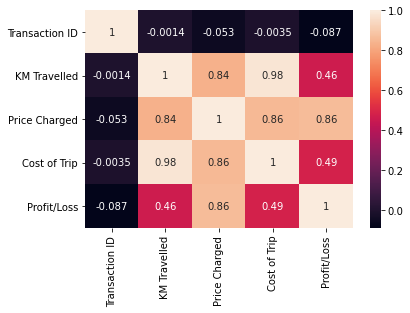

In [51]:
sns.heatmap(cab.corr(), color='b', annot=True)

# City Data

In [4]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [9]:
city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,BOSTON MA,"959,307","7,044"
freq,1,1,1


In [10]:
city.isna().sum()

City          0
Population    0
Users         0
dtype: int64

# Customer Data

In [5]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [11]:
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [12]:
customer.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

# Transaction Data

In [6]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [13]:
transaction.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [14]:
transaction.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64